# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

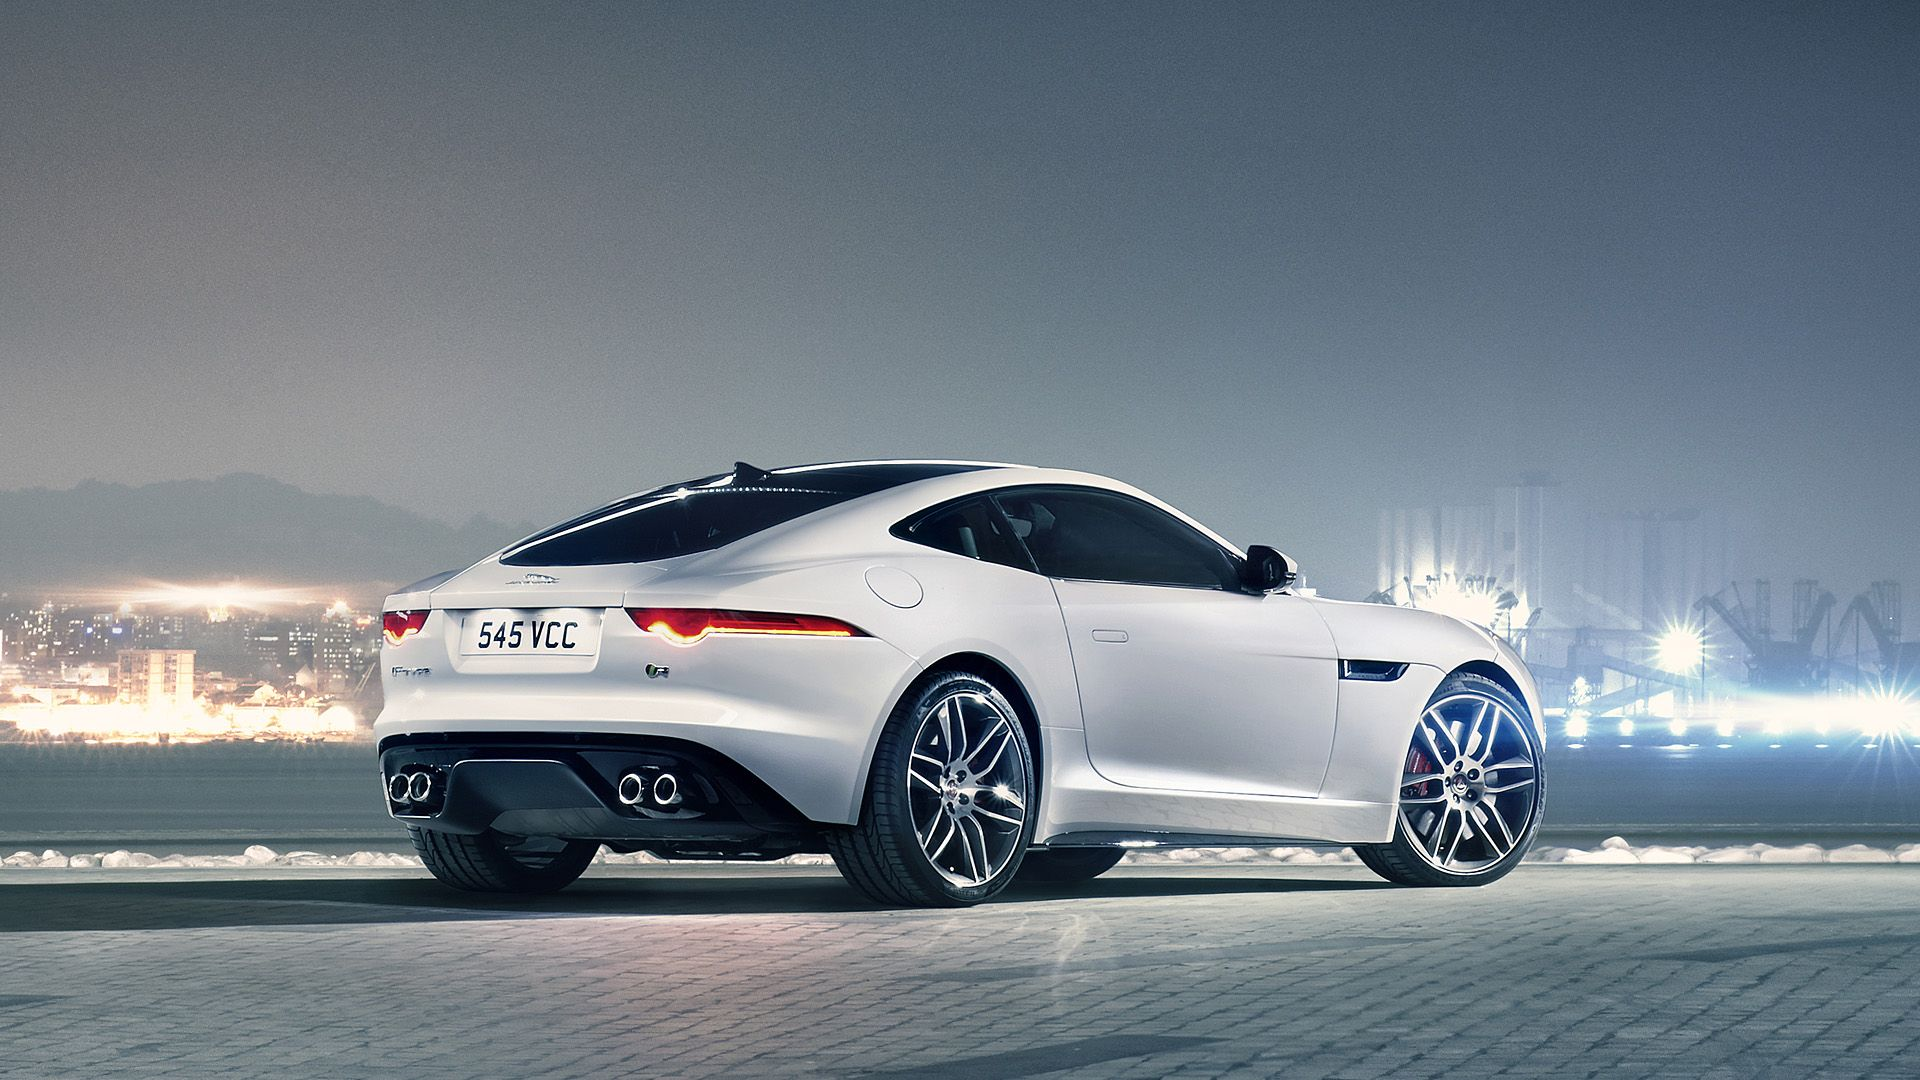

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company( https://www.autoscout24.com ) in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [128]:
df=pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


In [4]:
fiyatTahmini = pd.read_csv('final_scout_not_dummy.csv')
df = fiyatTahmini.copy()

In [5]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [6]:
df.columns = ['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kW', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb']

In [7]:
df.columns 

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kW', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

### Veri Seti
make_model: Araç markası ve modeli.
*Volkswagen Golf
*BMW 3 Series
*Audi A4
*Mercedes-Benz C-Class

body_type: Araç gövde tipi (örneğin sedan, hatchback, SUV vb.)

price: Araç fiyatı.

vat: KDV durumu.

km: Araç kilometre bilgisi.

Type: Araç tipi.

Fuel: Yakıt türü.

Gears: Vites sayısı.

Comfort_Convenience: Konfor ve kullanılabilirlik özellikleri.

Entertainment_Media: Eğlence ve medya özellikleri.

Extras: Ekstralar.

Safety_Security: Güvenlik özellikleri.

age: Araç yaşı.

Previous_Owners: Önceki sahiplerin sayısı.

hp_kW: Beygir gücü.

Inspection_new: Yeni muayene durumu.

Paint_Type: Boya tipi.

Upholstery_type: Döşeme tipi.

Gearing_Type: Vites tipi.

Displacement_cc: Silindir hacmi.

Weight_kg: Araç ağırlığı.

Drive_chain: Çekiş sistemi.

cons_comb: Kombine yakıt tüketimi.


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  inspection_new       15915 non-null 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
previous_owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [10]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
type                   0
fuel                   0
gears                  0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
age                    0
previous_owners        0
hp_kW                  0
inspection_new         0
paint_type             0
upholstery_type        0
gearing_type           0
displacement_cc        0
weight_kg              0
drive_chain            0
cons_comb              0
dtype: int64

In [11]:
df[df.duplicated()]

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
81,Audi A1,Sedans,18500,VAT deductible,13406.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Auxiliary heating,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Shift paddles...","Alarm system,Central door lock,Daytime running...",1.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
123,Audi A1,Sedans,18700,VAT deductible,27000.000000,Employee's car,Diesel,7.0,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1275.0,front,3.7
136,Audi A1,Compact,18333,VAT deductible,4800.000000,Employee's car,Benzine,7.0,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",1.0,1.0,70.0,1,Metallic,Cloth,Automatic,999.0,1165.0,front,4.4
287,Audi A1,Sedans,15090,VAT deductible,63668.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1135.0,front,3.5
291,Audi A1,Sedans,15090,VAT deductible,63668.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1135.0,front,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15889,Renault Espace,Van,42500,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.1
15897,Renault Espace,Van,41400,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.1
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3


In [12]:
df.duplicated().sum()

1673

In [13]:
#df = df.drop_duplicates(keep='first')

In [14]:
#df.duplicated().sum()

In [15]:
df.shape

(15915, 23)

In [16]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
type,15915,5,Used,11095
fuel,15915,4,Benzine,8548
comfort_convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
entertainment_media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
extras,15915,659,Alloy wheels,5785
safety_security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
paint_type,15915,3,Metallic,15246


In [17]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

# null değerlerin sayısını ve yüzdesini hesaplamak ve bunları bir DataFrame'de sunmak için kullanılır.

,count,percentage
make_model,0,0.0
body_type,0,0.0
price,0,0.0
vat,0,0.0
km,0,0.0
type,0,0.0
fuel,0,0.0
gears,0,0.0
comfort_convenience,0,0.0
entertainment_media,0,0.0


In [18]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

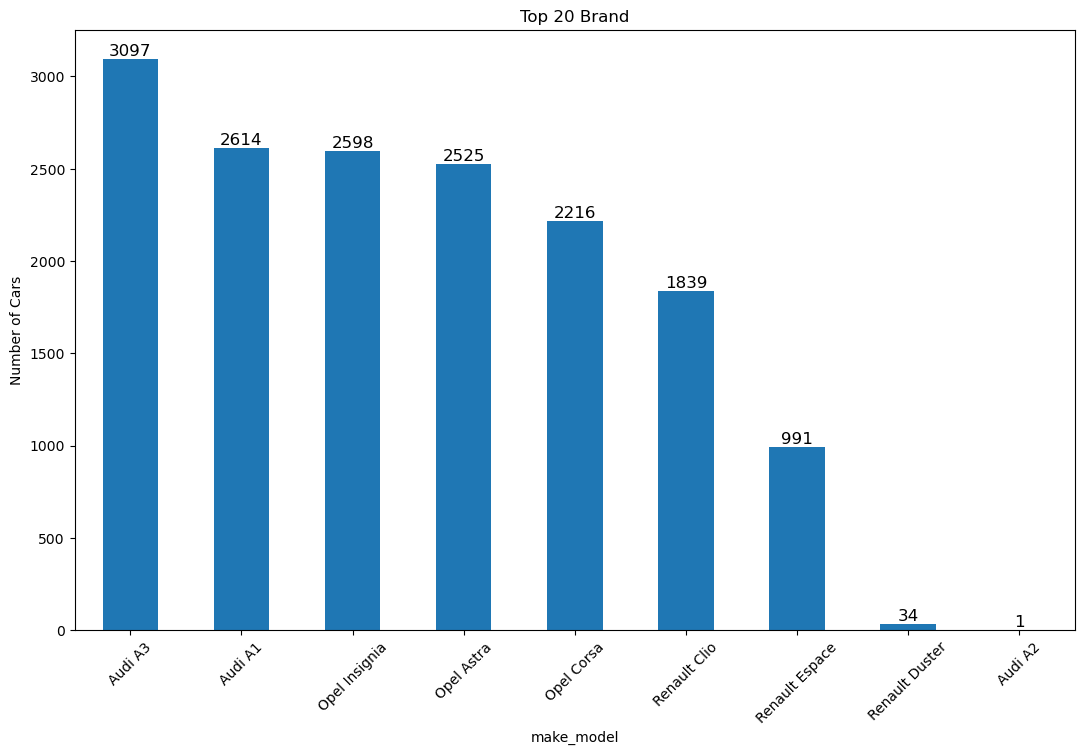

In [19]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make_model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

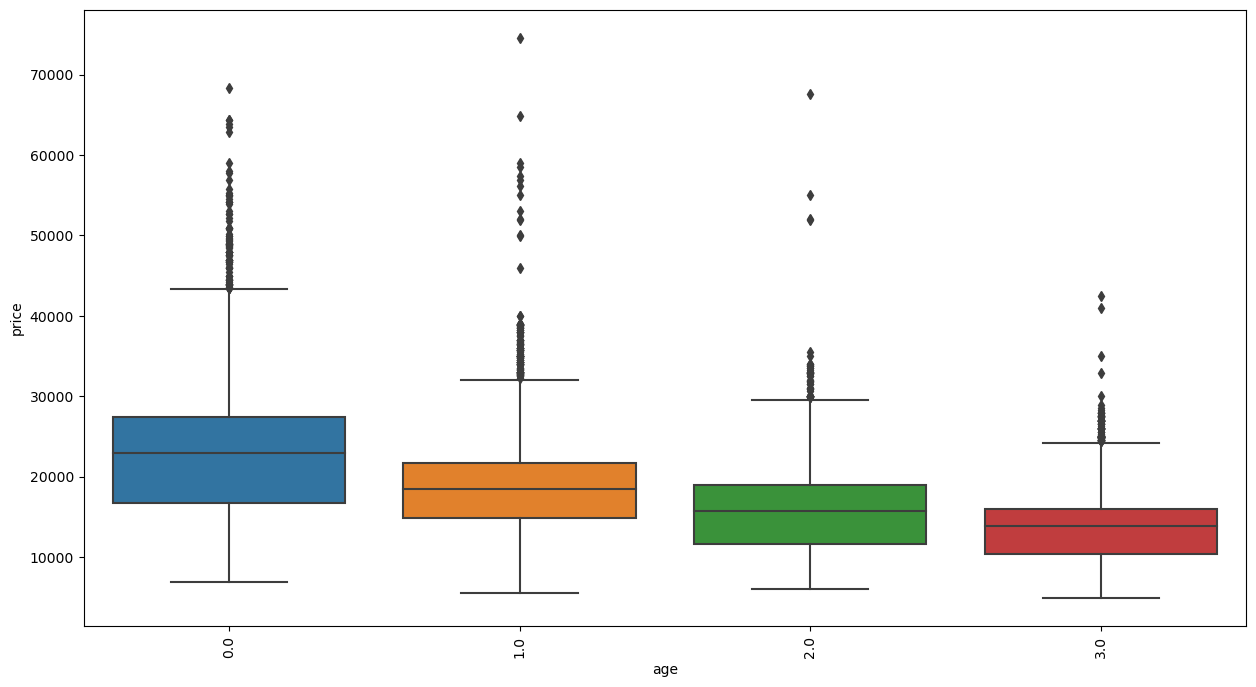

In [20]:
plt.figure(figsize = (15,8))
sns.boxplot(x="age", y="price", data=df)
plt.xticks(rotation = 90);

In [21]:
df.gears.value_counts().sort_values(ascending=False)

6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: gears, dtype: int64

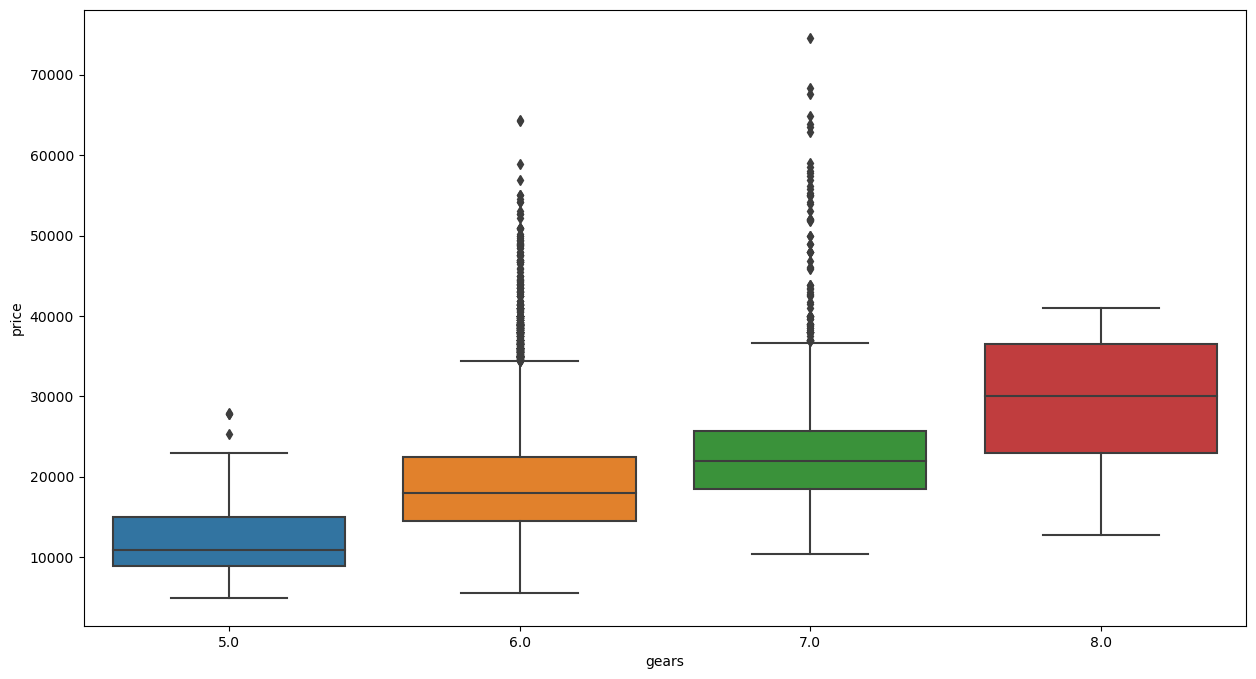

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(x="gears", y="price", data=df);

In [23]:
df.fuel.unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

In [24]:
df.fuel.value_counts()

Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

In [25]:
df[df["fuel"] == "Electric"]

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
3356,Audi A3,Compact,24950,VAT deductible,57000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",3.0,1.0,150.0,0,Metallic,Part/Full Leather,Semi-automatic,1400.0,1280.0,front,4.1
3612,Audi A3,Sedans,38450,Price negotiable,13800.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",1.0,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3615,Audi A3,Sedans,35899,Price negotiable,20880.0,Used,Electric,6.0,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",1.0,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3617,Audi A3,Sedans,38000,Price negotiable,12000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",1.0,1.0,110.0,0,Metallic,Part/Full Leather,Semi-automatic,1395.0,1615.0,front,4.0
13393,Renault Clio,Sedans,8490,VAT deductible,23863.0,Used,Electric,6.0,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,3.0,1.0,55.0,0,Metallic,Part/Full Leather,Automatic,1461.0,1165.0,front,5.0


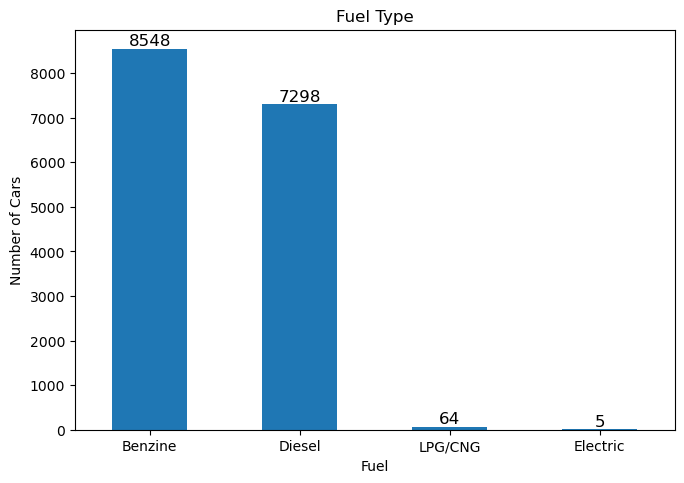

In [26]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('Fuel') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [27]:
df.safety_security.nunique()

4442

In [28]:
df_object=df.select_dtypes(include='object')
df_object

,make_model,body_type,vat,type,fuel,comfort_convenience,entertainment_media,extras,safety_security,paint_type,upholstery_type,gearing_type,drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,New,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Metallic,Part/Full Leather,Automatic,front
15911,Renault Espace,Van,VAT deductible,Used,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Cloth,Automatic,front
15912,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Part/Full Leather,Automatic,front
15913,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Metallic,Part/Full Leather,Automatic,front


In [29]:
df_object.entertainment_media

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15910    Bluetooth,Digital radio,Hands-free equipment,O...
15911    Bluetooth,Digital radio,Hands-free equipment,R...
15912    Bluetooth,Hands-free equipment,On-board comput...
15913                    Bluetooth,Digital radio,Radio,USB
15914                                                  USB
Name: entertainment_media, Length: 15915, dtype: object

In [30]:
from collections import Counter

media_counter = Counter()

for media in df_object['entertainment_media']:
    media_list = [media.strip() for media in media.split(',')]
    media_counter.update(media_list)

top_media = media_counter.most_common(20)
top_media

[('On-board computer', 13222),
 ('Radio', 13196),
 ('Bluetooth', 12685),
 ('Hands-free equipment', 10371),
 ('USB', 9019),
 ('MP3', 6258),
 ('CD player', 5024),
 ('Sound system', 2244),
 ('Digital radio', 2241),
 ('Television', 39)]

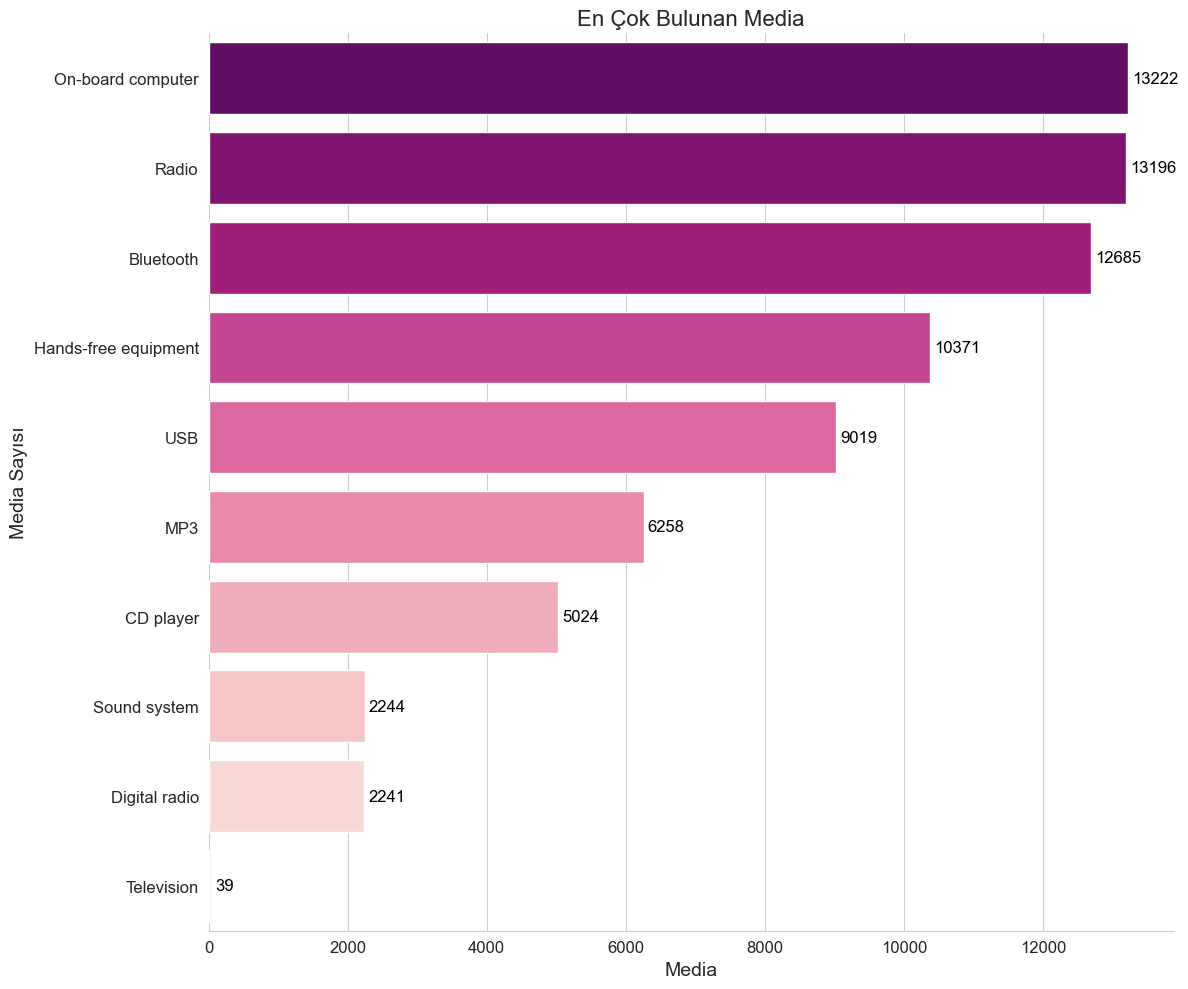

In [31]:
top_media_df = pd.DataFrame(top_media, columns=['entertainment_media', 'make_model'])
sns.set_style('whitegrid')
plt.figure(figsize=(12,10)) # grafiğin boyutunu büyüt
ax = sns.barplot(x='make_model', y='entertainment_media', data=top_media_df, palette='RdPu_r')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
sns.despine(left=True)
plt.title('En Çok Bulunan Media', fontsize=16) # başlık font boyutu büyüsün
plt.xlabel('Media', fontsize=14) # x ekseni başlık font boyutu
plt.ylabel('Media Sayısı', fontsize=14) # y ekseni başlık font boyutu
plt.xticks(fontsize=12, rotation=0) # x ekseni font boyutu ve hizalama ayarları
plt.yticks(fontsize=12) # y ekseni font boyutu
plt.tight_layout()
plt.show()

In [32]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [33]:
# list(le.classes_)

In [34]:
df_numeric=df.select_dtypes(include='number')
df_numeric

,price,km,gears,age,previous_owners,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


In [35]:
df=df_numeric
df.head()

,price,km,gears,age,previous_owners,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1


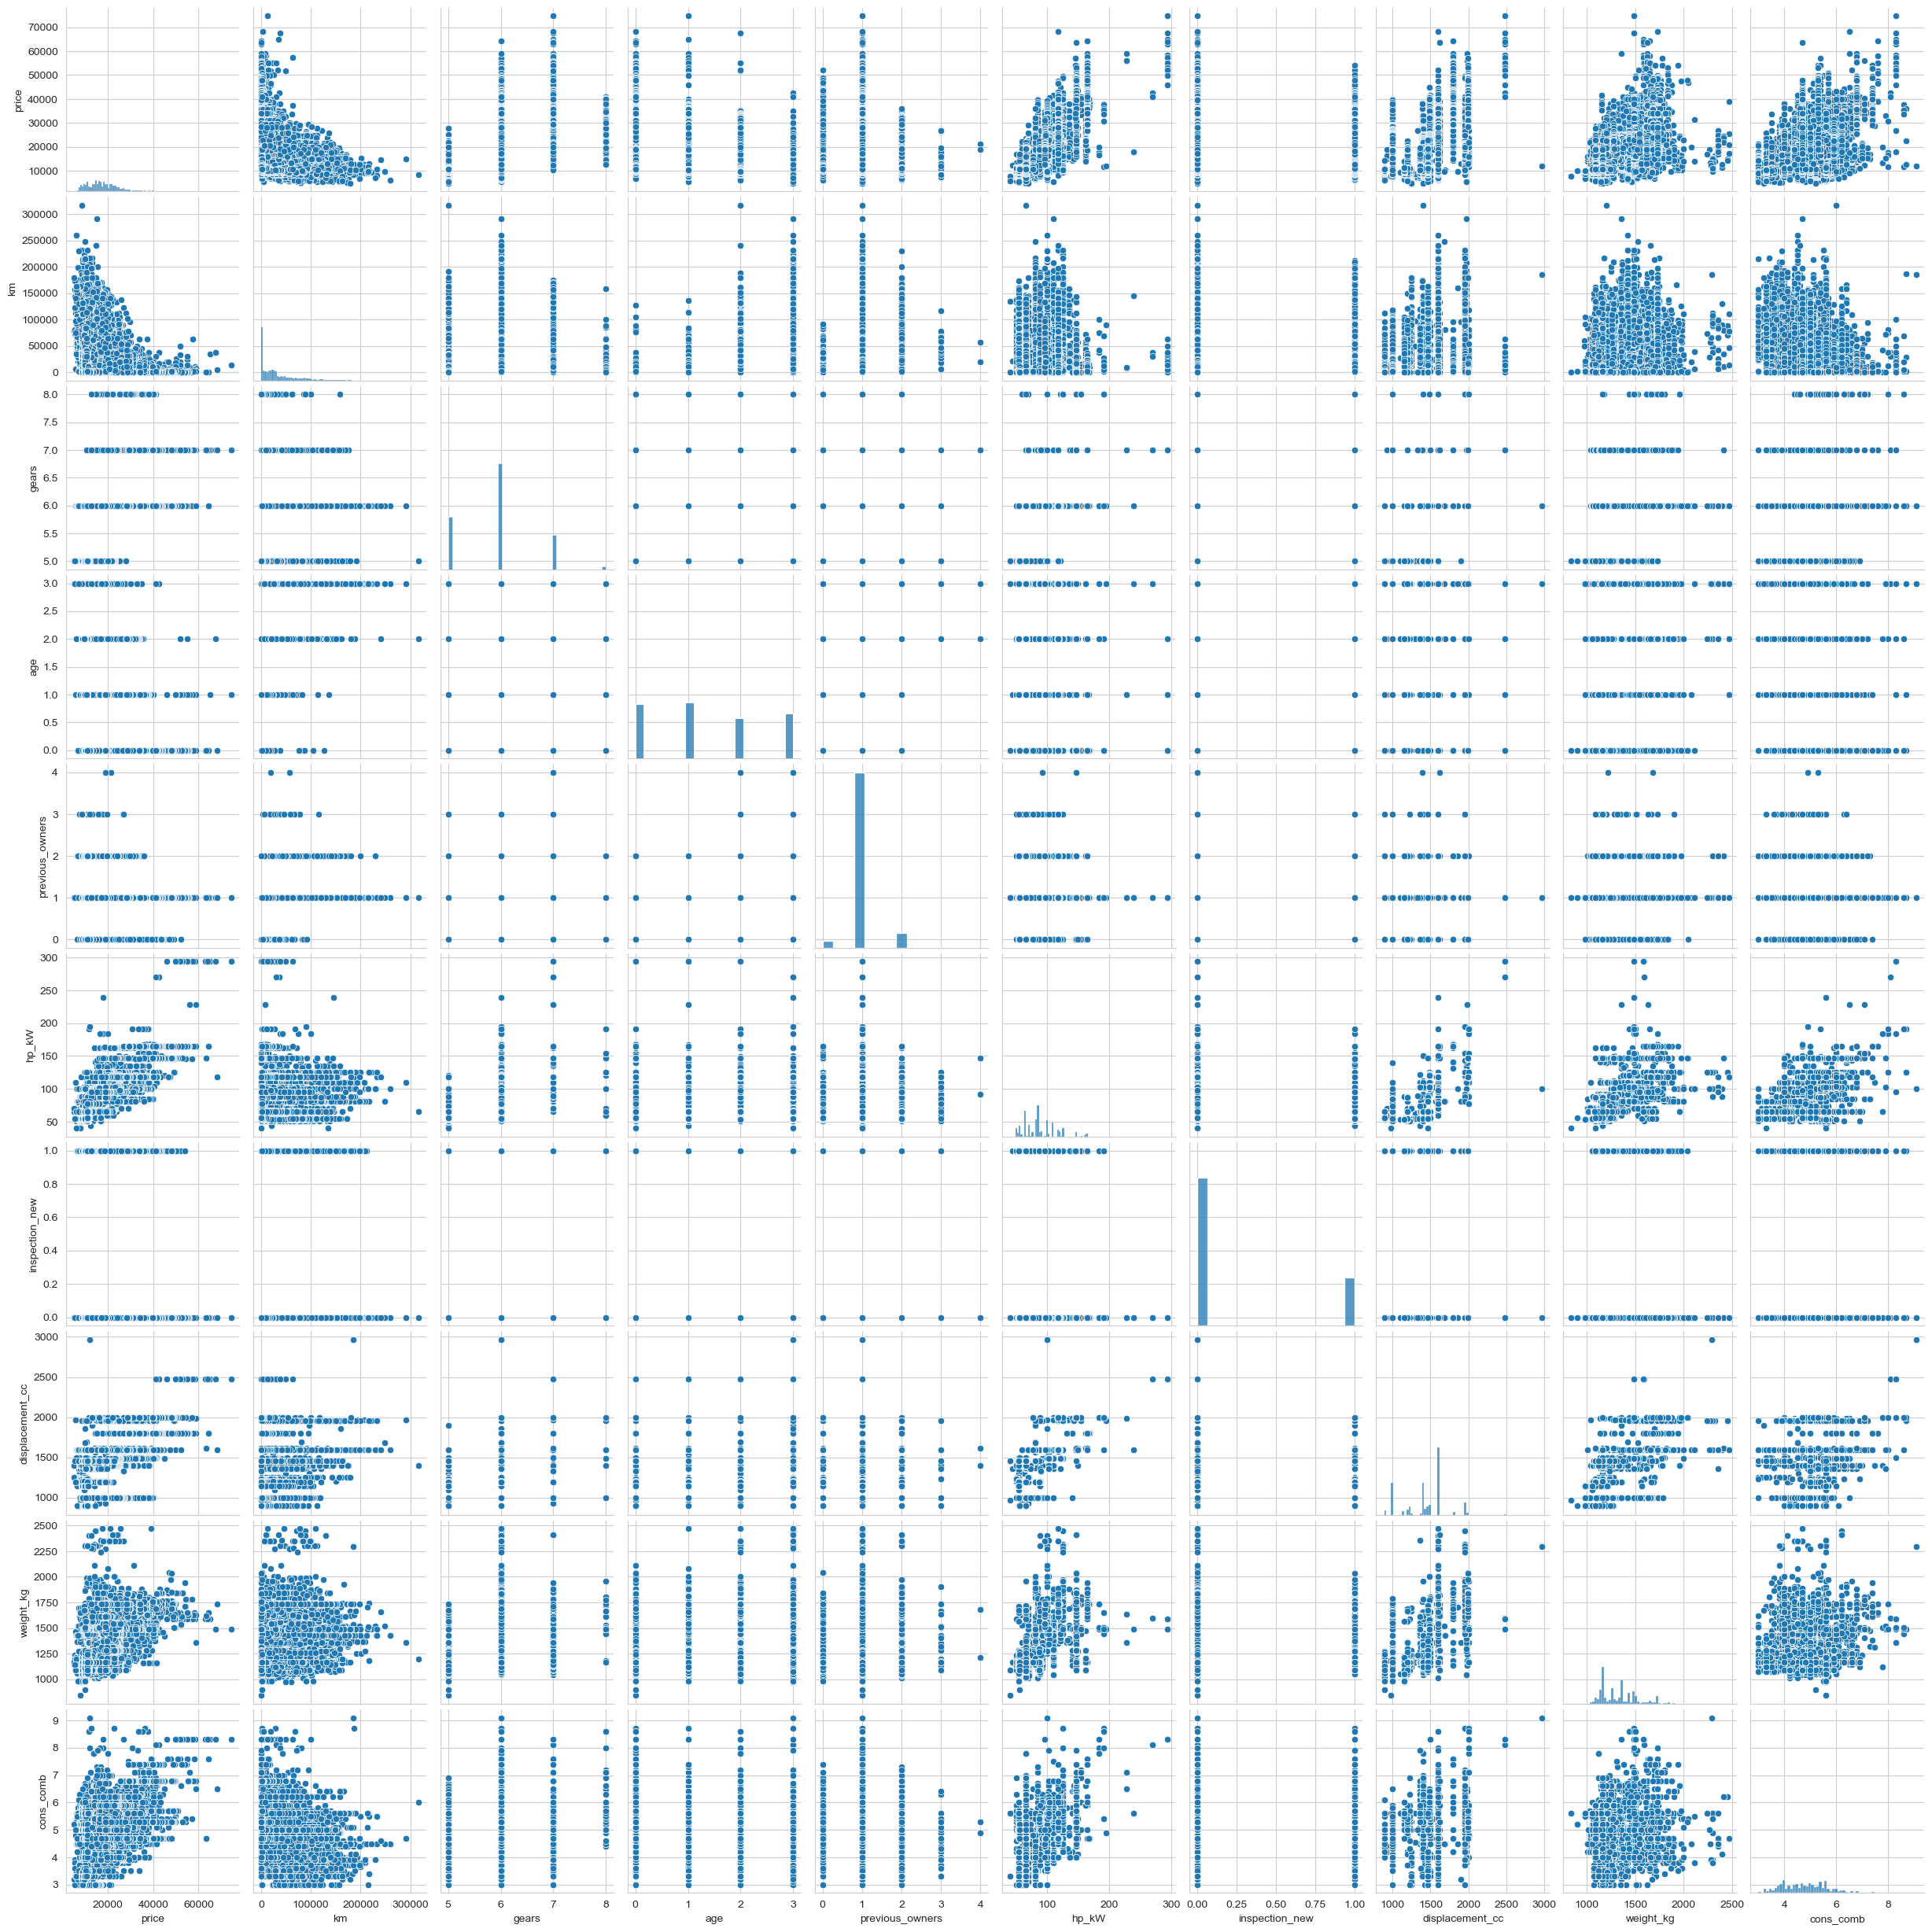

In [36]:
sns.pairplot(df);

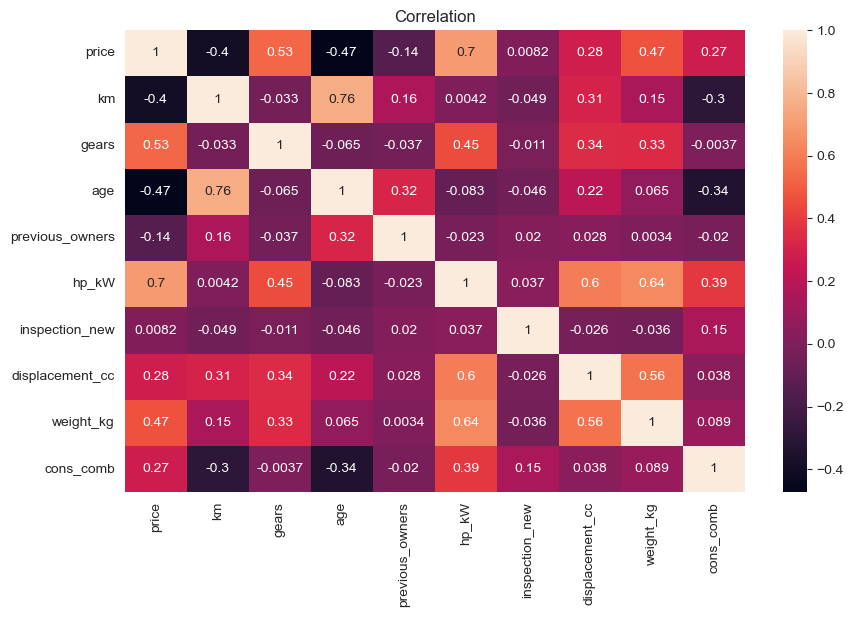

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation");

In [38]:
df.shape

(15915, 10)

## Outlier values

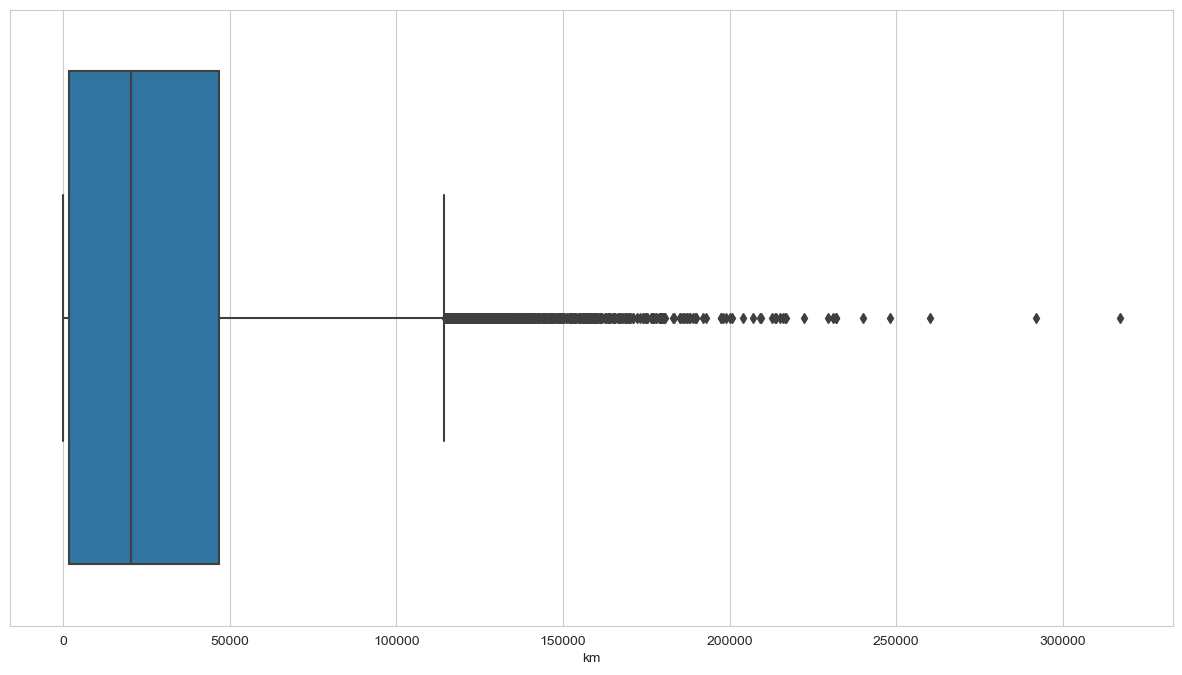

In [39]:
plt.figure(figsize = (15,8))
sns.boxplot(x="km",data=df);

In [40]:
q1 = df.km.quantile(0.25)
q1

1920.5

In [41]:
q3 = df.km.quantile(0.75)
q3

46900.0

In [42]:
iqr = q3 - q1
iqr

44979.5

In [43]:
alt_sinir = q1
alt_sinir

1920.5

In [44]:
ust_sinir = q3 +3 *iqr
ust_sinir 

181838.5

In [45]:
type(df["km"])

pandas.core.series.Series

In [46]:
df_km =pd.DataFrame(df["km"])

In [47]:
df_km.shape

(15915, 1)

In [48]:
df_km > ust_sinir

,km
0,False
1,False
2,False
3,False
4,False
...,...
15910,False
15911,False
15912,False
15913,False


In [49]:
aykiri_km = ( df_km > ust_sinir )

In [50]:
aykiri_km.sample(15)

,km
3505,False
8756,False
6289,False
9449,False
11600,False
7145,False
1033,False
14516,False
10716,False
4168,False


In [51]:
df_km[aykiri_km]

,km
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15910,NaN
15911,NaN
15912,NaN
15913,NaN


In [52]:
df_km[aykiri_km].index

RangeIndex(start=0, stop=15915, step=1)

In [53]:
ust_sinir

181838.5

In [54]:
df_km[aykiri_km] = ust_sinir

In [55]:
df_km[aykiri_km]

,km
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15910,NaN
15911,NaN
15912,NaN
15913,NaN


In [56]:
df_km = df_km[~( (df_km > (ust_sinir))).any(axis =1)]

In [57]:
df_km

,km
0,56013.000000
1,80000.000000
2,83450.000000
3,73000.000000
4,16200.000000
...,...
15910,1647.362609
15911,9900.000000
15912,15.000000
15913,10.000000


In [58]:
df_km[aykiri_km] = ust_sinir

In [59]:
df_km.sample(15)

,km
5123,10.000000
10048,10.000000
7768,1647.362609
821,21740.000000
15236,68570.000000
5796,54330.000000
14085,13534.000000
10514,109000.000000
5076,50.000000
11724,15565.000000


In [60]:
df_km.shape

(15915, 1)

In [61]:
X = df[["km","age","hp_kW","displacement_cc","weight_kg","cons_comb"]]
y = df["price"]

In [62]:
X

,km,age,hp_kW,displacement_cc,weight_kg,cons_comb
0,56013.000000,3.0,66.0,1422.0,1220.0,3.8
1,80000.000000,2.0,141.0,1798.0,1255.0,5.6
2,83450.000000,3.0,85.0,1598.0,1135.0,3.8
3,73000.000000,3.0,66.0,1422.0,1195.0,3.8
4,16200.000000,3.0,66.0,1422.0,1135.0,4.1
...,...,...,...,...,...,...
15910,1647.362609,0.0,147.0,1997.0,1758.0,5.3
15911,9900.000000,0.0,165.0,1798.0,1708.0,7.4
15912,15.000000,0.0,146.0,1997.0,1734.0,5.3
15913,10.000000,0.0,147.0,1997.0,1758.0,5.3


In [63]:
X.head()

,km,age,hp_kW,displacement_cc,weight_kg,cons_comb
0,56013.0,3.0,66.0,1422.0,1220.0,3.8
1,80000.0,2.0,141.0,1798.0,1255.0,5.6
2,83450.0,3.0,85.0,1598.0,1135.0,3.8
3,73000.0,3.0,66.0,1422.0,1195.0,3.8
4,16200.0,3.0,66.0,1422.0,1135.0,4.1


In [64]:
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15910    39950
15911    39885
15912    39875
15913    39700
15914    40999
Name: price, Length: 15915, dtype: int64

## Train | Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [68]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state = 42)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features},
                        index=range(1,d))

### Veri Ölçeklendirme (Scale) ve Bilgi Sızıntısı (Data Leakage)

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [70]:
scaler = StandardScaler()

In [71]:
poly(5)

,train_rmse_errors,test_rmse_errors,number of features
1,3983.644741,3863.635529,6
2,3520.249523,3464.559194,27
3,3297.994433,3574.916740,83
4,3707.895965,9474.686454,209


### Model Fit & Scale

In [72]:
scaler.fit(X_train)

#scaler.fit_transform(X_train) Ayrı ayrı yerine bu şekilde kullanımı önerilir

StandardScaler()

In [73]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.69983502, -1.24354991, -1.22557543, -1.92665275, -1.10461463,
         0.19448875],
       [-0.85676352, -1.24354991, -0.13981489, -1.56068681, -1.01921823,
        -0.03556939],
       [ 1.06717121,  1.43032041, -0.55165509, -0.11494016,  0.4325206 ,
        -0.3806566 ],
       ...,
       [-0.4826053 , -0.3522598 , -0.85117524, -0.02797795, -0.59725954,
        -0.95580194],
       [-0.82589008, -1.24354991,  2.18146627,  2.05549153,  2.1052854 ,
         0.53957596],
       [-0.10911979, -0.3522598 ,  0.12226524, -0.11131673, -0.3310237 ,
         0.65460503]])

In [74]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.71145936, -1.24354991,  0.42178539,  0.60974488,  0.7439663 ,
        -0.03556939],
       [-0.86663882, -1.24354991, -0.85117524, -1.56068681, -0.3310237 ,
         0.07945968],
       [-0.65495218,  0.5390303 , -0.43933504, -1.56431023, -0.3310237 ,
         0.07945968],
       ...,
       [-0.85326546, -1.24354991,  0.79618558, -0.11131673, -0.3310237 ,
         0.99969223],
       [-0.86946418, -0.3522598 , -0.85117524, -0.02797795, -0.59725954,
        -0.95580194],
       [-0.8701907 , -1.24354991,  0.79618558,  0.24740236, -0.17027753,
         0.53957596]])

In [75]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [76]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round().T

,mean,std
0,-0.0,1.0
1,-0.0,1.0
2,-0.0,1.0
3,-0.0,1.0
4,-0.0,1.0
5,0.0,1.0


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm = LinearRegression()

In [79]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [82]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [83]:
#np.set_printoptions(suppress = True)
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 

ls
# rounded_ls = [np.round(ls, 2) for value in ls]
# rounded_ls 

,linear_train,linear_test
R2,0.709407,0.723395
mse,15869425.424119,14927679.503759
rmse,3983.644741,3863.635529
mae,NaN,3020.028046


### Multicollinearity
Multicollinearity, lineer ve lojistik regresyon gibi gradient descent tabanlı modellerde karşılaşılan bir sorundur ve çeşitli şekillerde ele alınabilir:

Multicollinearity Nedir?

Tanım: Multicollinearity, bağımsız değişkenler arasında yüksek düzeyde korelasyon olması durumudur. Yani, bir veya daha fazla bağımsız değişken diğer bağımsız değişkenlerle güçlü bir ilişkiye sahip olduğunda ortaya çıkar.

Etkisi: Bu durum, modelin tahmin gücünü ve yorumlanabilirliğini etkiler. Modelin katsayılarının tahmini zorlaşır ve bu durum bazı bağımsız değişkenlerin etkisinin yanlış yorumlanmasına neden olabilir.

Multicollinearity Sorunları

Yorumlama Zorluğu: Bağımsız değişkenler arasındaki yüksek korelasyon, hangi değişkenin modelde gerçekten etkili olduğunu anlamayı zorlaştırır.

Katsayıların Güvenilirliği: Katsayılar, birbirleriyle yüksek derecede korele olan değişkenler nedeniyle güvenilmez olabilir.

Multicollinearity Giderme

Regülarizasyon Algoritmaları: Lasso ve Ridge gibi regülarizasyon teknikleri, Multicollinearity sorununu hafifletmeye yardımcı olur. Bu teknikler, modelin aşırı uyum (overfitting) sorununu çözerken aynı zamanda bağımsız değişkenler arasındaki yüksek korelasyon sorununu da azaltabilir.

Veri Ön İşleme: Bazı durumlarda, yüksek derecede korele değişkenlerin veri setinden çıkarılması veya birleştirilmesi, Multicollinearity azaltabilir.

Özetle, Multicollinearity, bağımsız değişkenler arasında yüksek korelasyon olduğunda ortaya çıkar ve modelin doğruluğunu ve yorumlanabilirliğini etkiler. Regülarizasyon teknikleri ve uygun veri ön işleme yöntemleri, bu sorunu hafifletmeye yardımcı olabilir.

In [84]:
def color_red(val):
   
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'black'
    return f'color: {color}'

In [85]:
pd.DataFrame(df).corr().style.applymap(color_red)

,price,km,gears,age,previous_owners,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
previous_owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kW,0.696411,0.004217,0.449793,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
inspection_new,0.008180,-0.049443,-0.011096,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814
displacement_cc,0.281824,0.306774,0.339507,0.215266,0.027958,0.597485,-0.025983,1.000000,0.563375,0.037814
weight_kg,0.468433,0.147098,0.333928,0.064883,0.003443,0.638310,-0.035517,0.563375,1.000000,0.088932
cons_comb,0.272261,-0.300198,-0.003733,-0.341303,-0.020172,0.388912,0.147814,0.037814,0.088932,1.000000


In [86]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,price,km,gears,age,previous_owners,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
previous_owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kW,0.696411,0.004217,0.449793,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
inspection_new,0.008180,-0.049443,-0.011096,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814
displacement_cc,0.281824,0.306774,0.339507,0.215266,0.027958,0.597485,-0.025983,1.000000,0.563375,0.037814
weight_kg,0.468433,0.147098,0.333928,0.064883,0.003443,0.638310,-0.035517,0.563375,1.000000,0.088932
cons_comb,0.272261,-0.300198,-0.003733,-0.341303,-0.020172,0.388912,0.147814,0.037814,0.088932,1.000000


## Cross-Validation: Model Performansının Değerlendirilmesi

In [87]:
from sklearn.model_selection import cross_validate, cross_val_score

In [88]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
RocCurveDisplay
SCORERS
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_loss
log_loss
make_scorer
matthews_corrcoef
max_error
mean_absolute_error
mean_absolute_percentage_error
mean_gamma_deviance
mean_

In [89]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [90]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003991,0.001993,0.705892,-3026.145562,-15804831.901843,-3975.529135
2,0.003989,0.001994,0.724066,-3062.774141,-15510714.310544,-3938.364421
3,0.003990,0.000998,0.706249,-3012.755139,-14952027.599949,-3866.785176
4,0.002990,0.001994,0.698354,-3171.583019,-16974233.403485,-4119.979782
5,0.003990,0.001996,0.708931,-3072.777520,-16257338.355531,-4032.038982


In [91]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

,cv_fit_time,cv_score_time,cv_test_r2,cv_test_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_test_neg_root_mean_squared_error
1,0.003991,0.001993,0.705892,-3026.145562,-15804831.901843,-3975.529135
2,0.003989,0.001994,0.724066,-3062.774141,-15510714.310544,-3938.364421
3,0.003990,0.000998,0.706249,-3012.755139,-14952027.599949,-3866.785176
4,0.002990,0.001994,0.698354,-3171.583019,-16974233.403485,-4119.979782
5,0.003990,0.001996,0.708931,-3072.777520,-16257338.355531,-4032.038982


In [92]:
cv_df.iloc[:, 2:].mean()

cv_test_r2                                    0.708698
cv_test_neg_mean_absolute_error           -3069.207076
cv_test_neg_mean_squared_error        -15899829.114270
cv_test_neg_root_mean_squared_error       -3986.539499
dtype: float64

In [93]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.709407,0.723395
mse,15869425.424119,14927679.503759
rmse,3983.644741,3863.635529
mae,NaN,3020.028046


In [94]:
lm.coef_

array([-1688.15778427, -2227.10465434,  5166.77934797,  -523.68914849,
         956.24103017, -1343.68750944])

In [95]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-1688.157784
1,-2227.104654
2,5166.779348
3,-523.689148
4,956.241030
5,-1343.687509


# Regularization

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [96]:
from sklearn.linear_model import Ridge

In [97]:
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [98]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [99]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [100]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.709407,0.723396
mse,15869425.938008,14927674.041467
rmse,3983.644806,3863.634822
mae,NaN,3020.037305


In [101]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.709407,0.723395,0.709407,0.723396
mse,15869425.424119,14927679.503759,15869425.938008,14927674.041467
rmse,3983.644741,3863.635529,3983.644806,3863.634822
mae,NaN,3020.028046,NaN,3020.037305


### For Ridge Regression CV with alpha : 1

In [102]:
model = Ridge(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [103]:
pd.DataFrame(scores, index=range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004993,0.002987,0.705901,-3026.118609,-15804337.617796,-3975.466969
2,0.003994,0.001992,0.724065,-3062.783445,-15510735.580175,-3938.367121
3,0.002989,0.000998,0.706250,-3012.777486,-14952008.913680,-3866.782760
4,0.004986,0.001995,0.698346,-3171.629546,-16974687.190285,-4120.034853
5,0.003990,0.000996,0.708931,-3072.787877,-16257335.233742,-4032.038595


In [104]:
cvr_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cvr_")
cvr_df

,cvr_fit_time,cvr_score_time,cvr_test_r2,cvr_test_neg_mean_absolute_error,cvr_test_neg_mean_squared_error,cvr_test_neg_root_mean_squared_error
1,0.004993,0.002987,0.705901,-3026.118609,-15804337.617796,-3975.466969
2,0.003994,0.001992,0.724065,-3062.783445,-15510735.580175,-3938.367121
3,0.002989,0.000998,0.706250,-3012.777486,-14952008.913680,-3866.782760
4,0.004986,0.001995,0.698346,-3171.629546,-16974687.190285,-4120.034853
5,0.003990,0.000996,0.708931,-3072.787877,-16257335.233742,-4032.038595


In [105]:
cvr_df.iloc[:, 2:].mean()

cvr_test_r2                                    0.708698
cvr_test_neg_mean_absolute_error           -3069.219392
cvr_test_neg_mean_squared_error        -15899820.907136
cvr_test_neg_root_mean_squared_error       -3986.538060
dtype: float64

In [106]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                                    0.708698
test_neg_mean_absolute_error           -3069.219392
test_neg_mean_squared_error        -15899820.907136
test_neg_root_mean_squared_error       -3986.538060
dtype: float64

In [107]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.709407,0.723396
mse,15869425.938008,14927674.041467
rmse,3983.644806,3863.634822
mae,NaN,3020.037305


## Overfitting Sorununun Çözülmesi

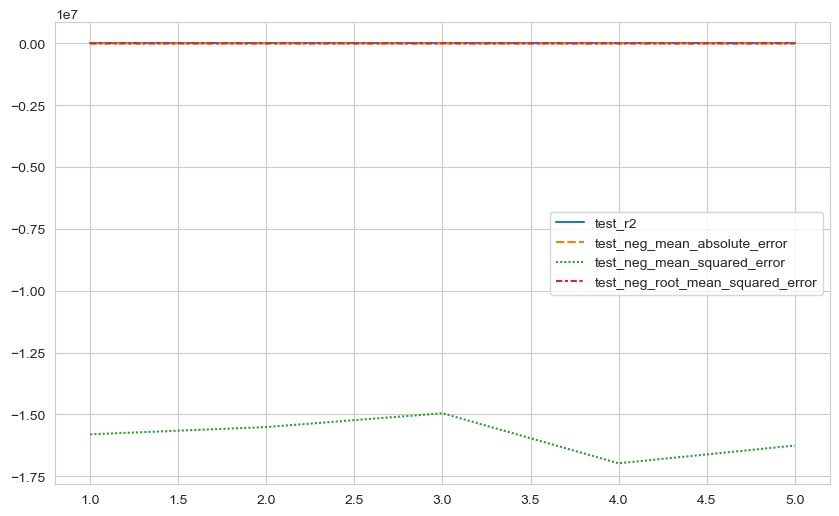

In [108]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

### Ridge Model Katsayıları

In [109]:
ridge_model.coef_

array([-1688.16202472, -2226.95262078,  5165.71159914,  -523.21944186,
         956.52251352, -1343.15203175])

In [110]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [111]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-1688.157784,-1688.162025
1,-2227.104654,-2226.952621
2,5166.779348,5165.711599
3,-523.689148,-523.219442
4,956.241030,956.522514
5,-1343.687509,-1343.152032


#### Choosing best alpha value with Cross Validation (CV) (Rigde) (En İyi Alpha Değerinin Seçimi)

In [112]:
from sklearn.linear_model import RidgeCV

In [113]:
alpha_space = np.linspace(4.01, 5, 100)
alpha_space

array([4.01, 4.02, 4.03, 4.04, 4.05, 4.06, 4.07, 4.08, 4.09, 4.1 , 4.11,
       4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2 , 4.21, 4.22,
       4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29, 4.3 , 4.31, 4.32, 4.33,
       4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 , 4.41, 4.42, 4.43, 4.44,
       4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51, 4.52, 4.53, 4.54, 4.55,
       4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62, 4.63, 4.64, 4.65, 4.66,
       4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.77,
       4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84, 4.85, 4.86, 4.87, 4.88,
       4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99,
       5.  ])

In [114]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 5, scoring = "neg_root_mean_squared_error")

In [115]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([4.01, 4.02, 4.03, 4.04, 4.05, 4.06, 4.07, 4.08, 4.09, 4.1 , 4.11,
       4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2 , 4.21, 4.22,
       4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29, 4.3 , 4.31, 4.32, 4.33,
       4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 , 4.41, 4.42, 4.43, 4.44,
       4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51, 4.52, 4.53, 4.54, 4.55,
       4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62, 4.63, 4.64, 4.65, 4.66,
       4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.77,
       4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84, 4.85, 4.86, 4.87, 4.88,
       4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99,
       5.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [116]:
ridge_cv_model.alpha_

5.0

In [117]:
ridge_cv_model.best_score_

-3986.5343243297525

In [118]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [119]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "rigde_cv")
rcs

,rigde_cv_train,rigde_cv_test
R2,0.709407,0.723396
mse,15869438.243920,14927663.196928
rmse,3983.646350,3863.633419
mae,NaN,3020.074196


In [120]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test
R2,0.709407,0.723395,0.709407,0.723396,0.709407,0.723396
mse,15869425.424119,14927679.503759,15869425.938008,14927674.041467,15869438.243920,14927663.196928
rmse,3983.644741,3863.635529,3983.644806,3863.634822,3983.646350,3863.633419
mae,NaN,3020.028046,NaN,3020.037305,NaN,3020.074196


In [121]:
ridge_cv_model.coef_

array([-1688.17817718, -2226.34497361,  5161.44682114,  -521.34370853,
         957.64596525, -1341.01299801])

In [122]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_4.49"])

In [123]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_4.49
0,-1688.157784,-1688.162025,-1688.178177
1,-2227.104654,-2226.952621,-2226.344974
2,5166.779348,5165.711599,5161.446821
3,-523.689148,-523.219442,-521.343709
4,956.241030,956.522514,957.645965
5,-1343.687509,-1343.152032,-1341.012998


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [124]:
from sklearn.linear_model import Lasso, LassoCV

In [125]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

make_model: Araç markası ve modeli. *Volkswagen Golf *BMW 3 Series *Audi A4 *Mercedes-Benz C-Class

body_type: Araç gövde tipi (örneğin sedan, hatchback, SUV vb.)

price: Araç fiyatı.

vat: KDV durumu.

km: Araç kilometre bilgisi.

Type: Araç tipi.

Fuel: Yakıt türü.

Gears: Vites sayısı.

Comfort_Convenience: Konfor ve kullanılabilirlik özellikleri.

Entertainment_Media: Eğlence ve medya özellikleri.

Extras: Ekstralar.

Safety_Security: Güvenlik özellikleri.

age: Araç yaşı.

Previous_Owners: Önceki sahiplerin sayısı.

hp_kW: Beygir gücü.

Inspection_new: Yeni muayene durumu.

Paint_Type: Boya tipi.

Upholstery_type: Döşeme tipi.

Gearing_Type: Vites tipi.

Displacement_cc: Silindir hacmi.

Weight_kg: Araç ağırlığı.

Drive_chain: Çekiş sistemi.

cons_comb: Kombine yakıt tüketimi.

In [130]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


In [131]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [132]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the lebel encoder on all columns
le.fit(df[["Gearing_Type"]]) 

# Apply the encoding to each column
df["Gearing_Type"] = le.transform(df["Gearing_Type"]) 


In [133]:
df["Gearing_Type"]

0        0
1        0
2        0
3        0
4        0
        ..
15910    0
15911    0
15912    0
15913    0
15914    0
Name: Gearing_Type, Length: 15915, dtype: int32

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7,1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 0) # verbose alttaki raporu verdi

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_index_

In [ ]:
grid_model.best_score_

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

## Feature Importance 

## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |